R² Score (With Outliers): 0.9165
R² Score (Without Outliers): 0.9927


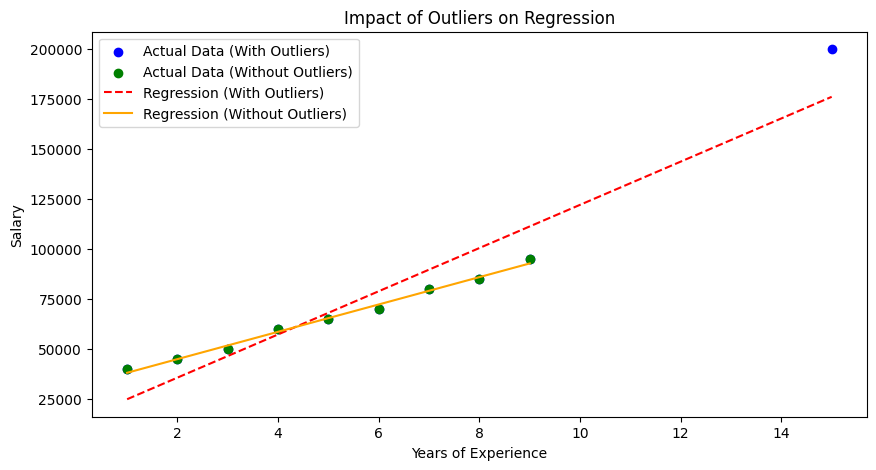

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Sample dataset with an outlier
data = {
    "YearsExperience": [1, 2, 3, 4, 5, 6, 7, 8, 9, 15],  # Outlier at 15
    "Salary": [40000, 45000, 50000, 60000, 65000, 70000, 80000, 85000, 95000, 200000]  # Outlier at 200000
}

df = pd.DataFrame(data)

# Step 1: Detect Outliers using IQR
Q1 = df["Salary"].quantile(0.25)
Q3 = df["Salary"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter data without outliers
df_no_outliers = df[(df["Salary"] >= lower_bound) & (df["Salary"] <= upper_bound)]

# Define Features and Target
X = df[["YearsExperience"]]
y = df["Salary"]
X_no_outliers = df_no_outliers[["YearsExperience"]]
y_no_outliers = df_no_outliers["Salary"]

# Train Linear Regression (With Outliers)
model_with_outliers = LinearRegression()
model_with_outliers.fit(X, y)
y_pred_with_outliers = model_with_outliers.predict(X)
r2_with_outliers = r2_score(y, y_pred_with_outliers)

# Train Linear Regression (Without Outliers)
model_no_outliers = LinearRegression()
model_no_outliers.fit(X_no_outliers, y_no_outliers)
y_pred_no_outliers = model_no_outliers.predict(X_no_outliers)
r2_no_outliers = r2_score(y_no_outliers, y_pred_no_outliers)

# Step 3: Compare Model Performance
print(f"R² Score (With Outliers): {r2_with_outliers:.4f}")
print(f"R² Score (Without Outliers): {r2_no_outliers:.4f}")

# Visualization
plt.figure(figsize=(10, 5))
plt.scatter(X, y, color="blue", label="Actual Data (With Outliers)")
plt.scatter(X_no_outliers, y_no_outliers, color="green", label="Actual Data (Without Outliers)")
plt.plot(X, y_pred_with_outliers, color="red", linestyle="dashed", label="Regression (With Outliers)")
plt.plot(X_no_outliers, model_no_outliers.predict(X_no_outliers), color="orange", label="Regression (Without Outliers)")

plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Impact of Outliers on Regression")
plt.legend()
plt.show()
